In [280]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,KFold
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [281]:
train = pd.read_csv("/kaggle/input/playground-series-s3e2/train.csv")
train


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0
15302,15302,Male,46.0,0,0,Yes,Private,Rural,101.13,22.5,Unknown,0


In [282]:
test = pd.read_csv("/kaggle/input/playground-series-s3e2/test.csv")
test

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
1,15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
2,15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
3,15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
4,15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...,...
10199,25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
10200,25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
10201,25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown
10202,25506,Male,31.0,0,0,Yes,Private,Urban,82.41,28.7,never smoked


In [283]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [284]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10204 entries, 0 to 10203
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10204 non-null  int64  
 1   gender             10204 non-null  object 
 2   age                10204 non-null  float64
 3   hypertension       10204 non-null  int64  
 4   heart_disease      10204 non-null  int64  
 5   ever_married       10204 non-null  object 
 6   work_type          10204 non-null  object 
 7   Residence_type     10204 non-null  object 
 8   avg_glucose_level  10204 non-null  float64
 9   bmi                10204 non-null  float64
 10  smoking_status     10204 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 877.0+ KB


In [285]:
train.describe(include="all")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,15304.000000,15304,15304.000000,15304.000000,15304.000000,15304,15304,15304,15304.000000,15304.000000,15304,15304.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Rural,NaN,NaN,never smoked,NaN
freq,NaN,9446,NaN,NaN,NaN,10385,9752,7664,NaN,NaN,6281,NaN
mean,7651.500000,NaN,41.417708,0.049726,0.023327,NaN,NaN,NaN,89.039853,28.112721,NaN,0.041296
std,4418.028595,NaN,21.444673,0.217384,0.150946,NaN,NaN,NaN,25.476102,6.722315,NaN,0.198981
min,0.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.220000,10.300000,NaN,0.000000
25%,3825.750000,NaN,26.000000,0.000000,0.000000,NaN,NaN,NaN,74.900000,23.500000,NaN,0.000000
50%,7651.500000,NaN,43.000000,0.000000,0.000000,NaN,NaN,NaN,85.120000,27.600000,NaN,0.000000
75%,11477.250000,NaN,57.000000,0.000000,0.000000,NaN,NaN,NaN,96.980000,32.000000,NaN,0.000000


In [286]:
train.isnull().sum()/len(train.index)

id                   0.0
gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [287]:
categorical_features = [ 'gender', 'work_type', 'smoking_status', 'Residence_type', 'ever_married', 'heart_disease', 'hypertension']
numerical_features = ['age', 'avg_glucose_level', 'bmi']

target_feature = ['stroke']

total_categorical_features = categorical_features + target_feature

In [288]:
train[train['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9363,9363,Other,9.0,0,0,No,children,Rural,96.04,18.0,Unknown,0


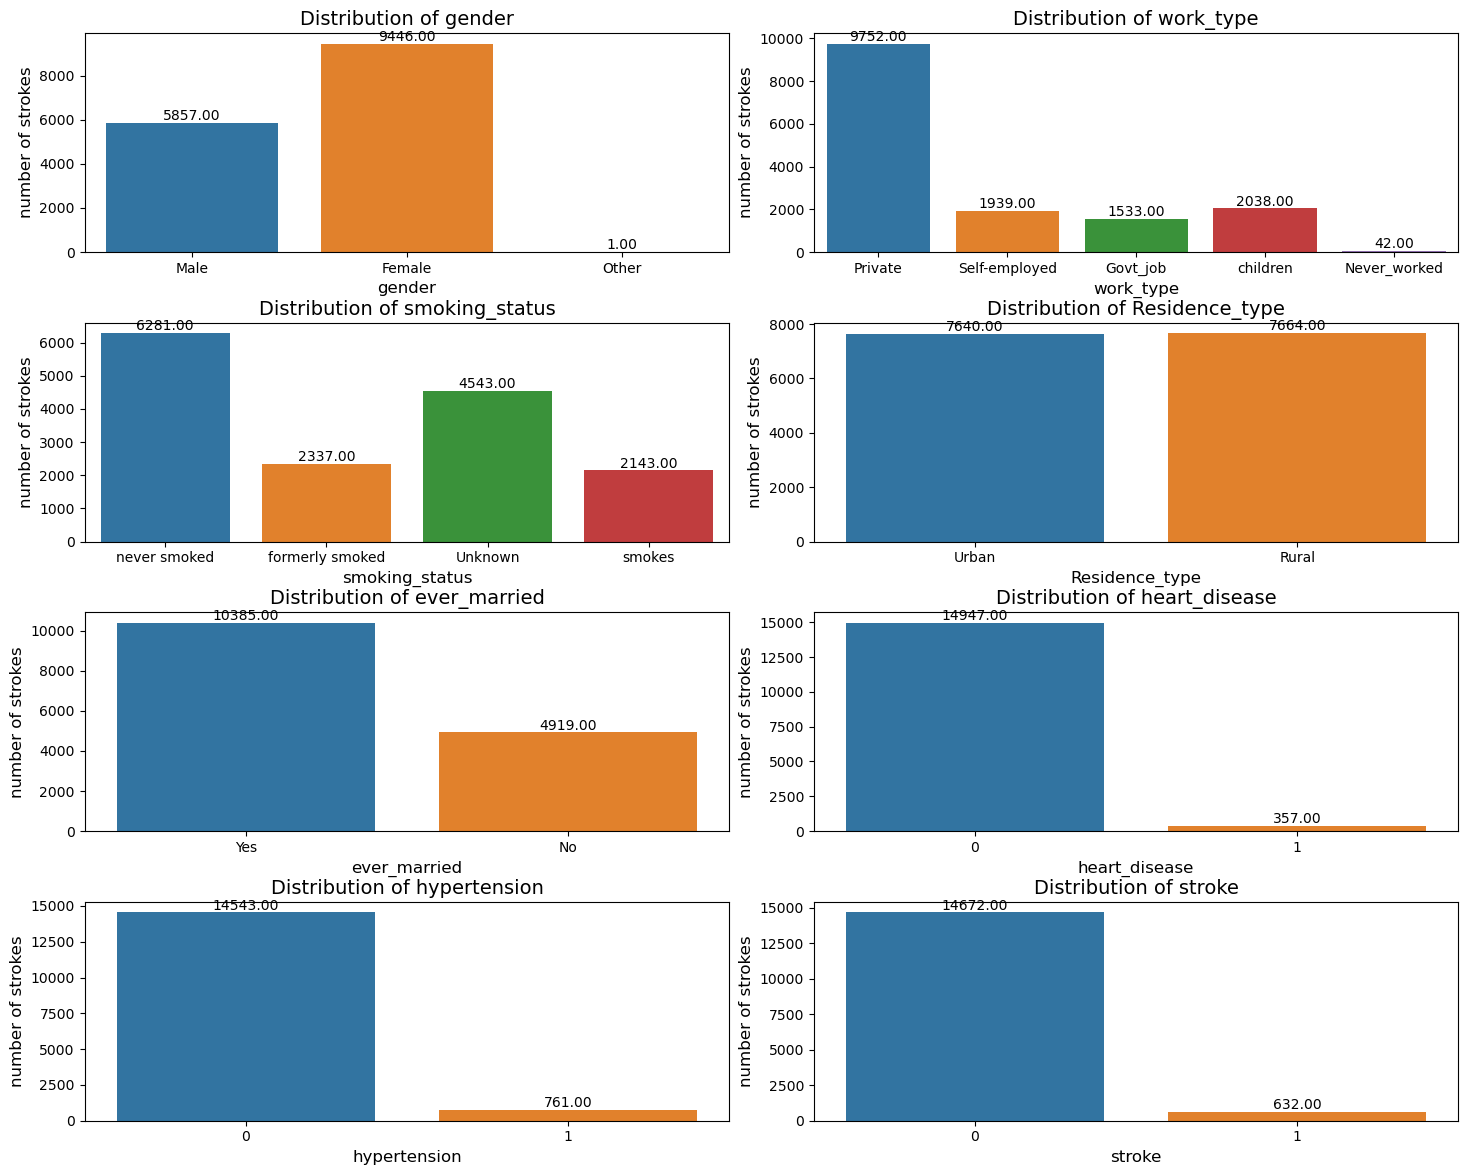

In [289]:
row, col = 4, 2
fig, axis = plt.subplots(row, col, figsize=(15, 12))
fig.tight_layout(pad=3.0)
col_num = 0

for i in range(row):
    for j in range(col):
        if col_num > len(total_categorical_features) - 1:
            break
        
        sns.countplot(ax=axis[i, j], x=train[total_categorical_features[col_num]])
        axis[i, j].set_xlabel(total_categorical_features[col_num], fontsize=12)
        axis[i, j].set_ylabel('number of strokes', fontsize=12)
        axis[i, j].set_title(f'Distribution of {total_categorical_features[col_num]}', fontsize=14)
        
        for p in axis[i, j].patches:
            axis[i, j].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        
        col_num += 1

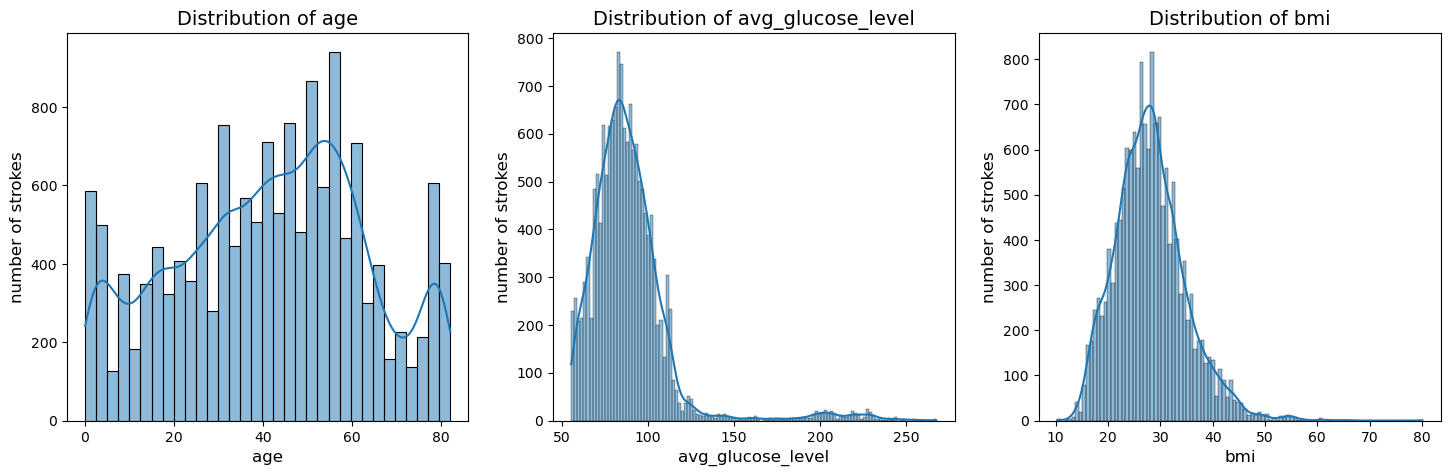

In [290]:
row, col = 1, 3
fig, axis = plt.subplots(row, col, figsize=(15, 5))
fig.tight_layout(pad=3.0)
col_num = 0

for i in range(row):
    for j in range(col):
        if col_num > len(numerical_features) - 1:
            break
        sns.histplot(ax=axis[j], x=train[numerical_features[col_num]], kde=True)
        axis[j].set_xlabel(numerical_features[col_num], fontsize=12)
        axis[j].set_ylabel('number of strokes', fontsize=12)
        axis[j].set_title(f'Distribution of {numerical_features[col_num]}', fontsize=14)
        col_num += 1

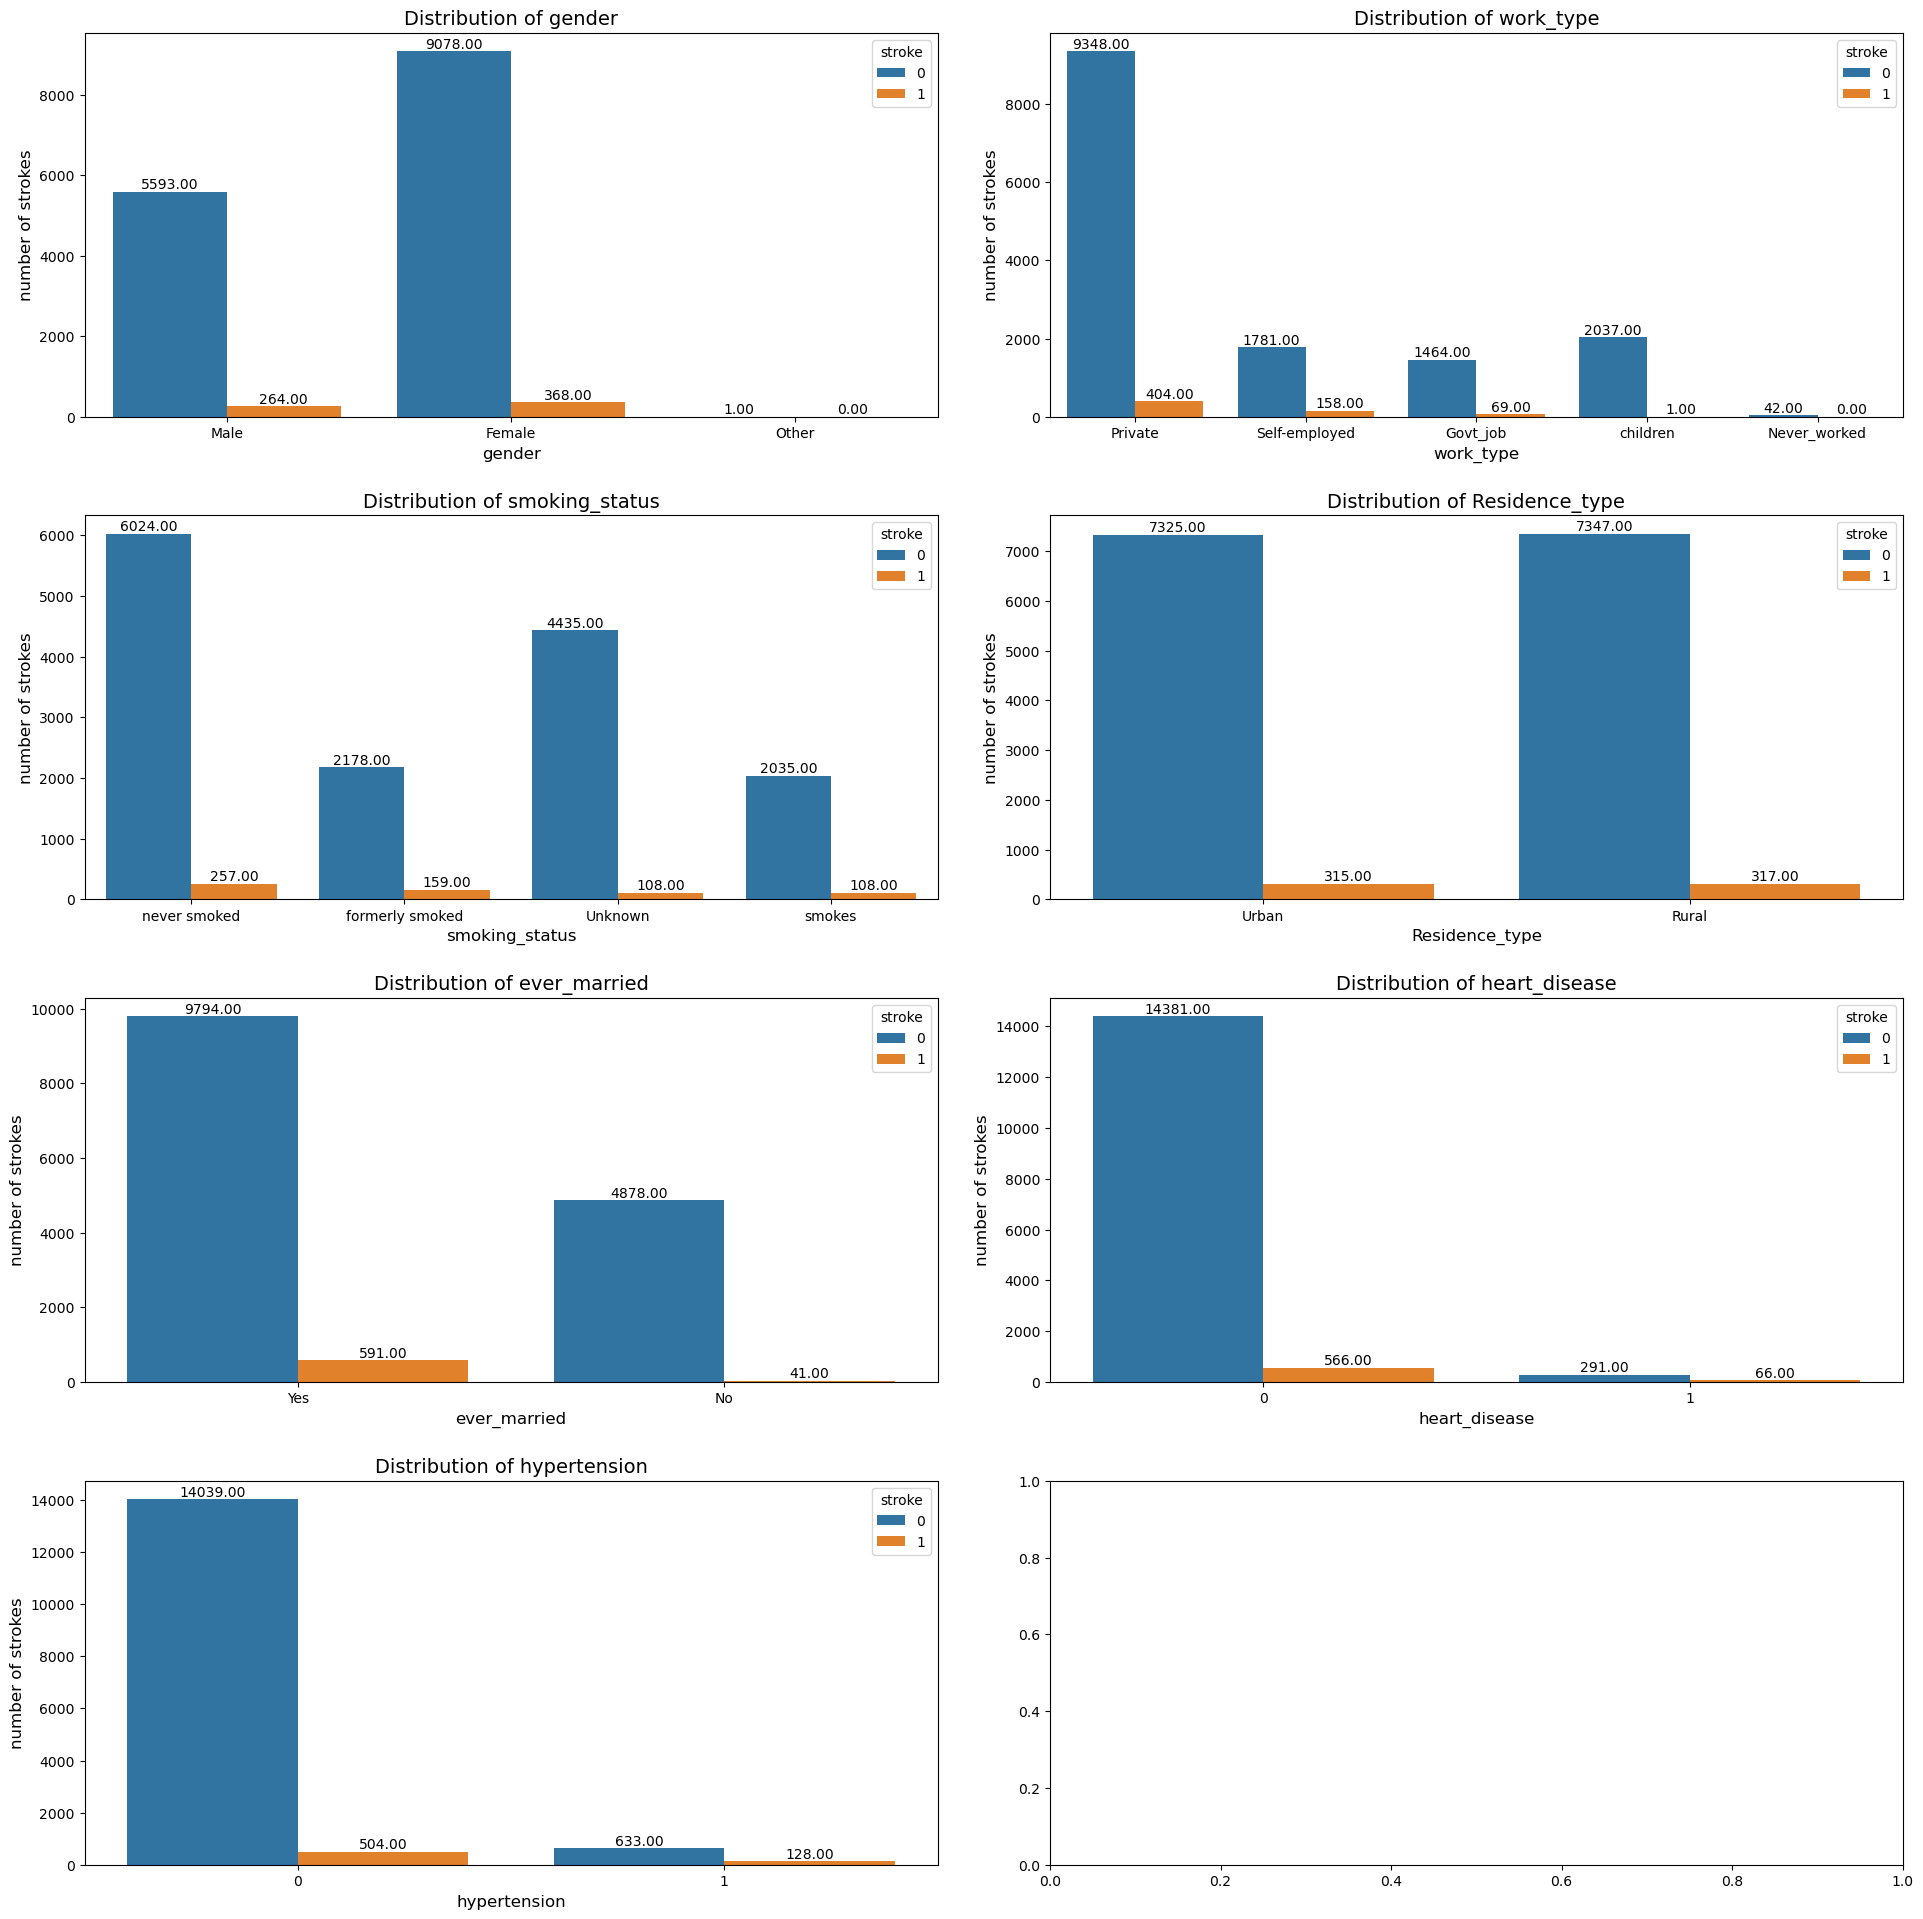

In [291]:
row,col = 4,2
fig,axis = plt.subplots(row, col, figsize=(20,20))
fig.tight_layout(pad=5.0)
col_num = 0
for i in range(row):
    for j in range(col):
        if(col_num > len(categorical_features)-1):
            break
        sns.countplot(ax=axis[i,j], x=train[categorical_features[col_num]], hue=train['stroke'])
        axis[i,j].set_xlabel(categorical_features[col_num], fontsize=12)
        axis[i,j].set_ylabel('number of strokes', fontsize=12)
        axis[i,j].set_title(f'Distribution of { categorical_features[col_num] }', fontsize=14)
        for p in axis[i,j].patches:
            axis[i,j].annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
        col_num += 1

<Axes: xlabel='bmi', ylabel='avg_glucose_level'>

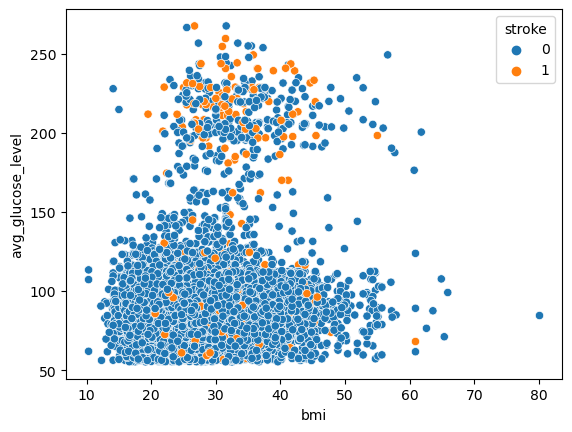

In [292]:
sns.scatterplot(x=train['bmi'], y=train['avg_glucose_level'], hue=train['stroke'])

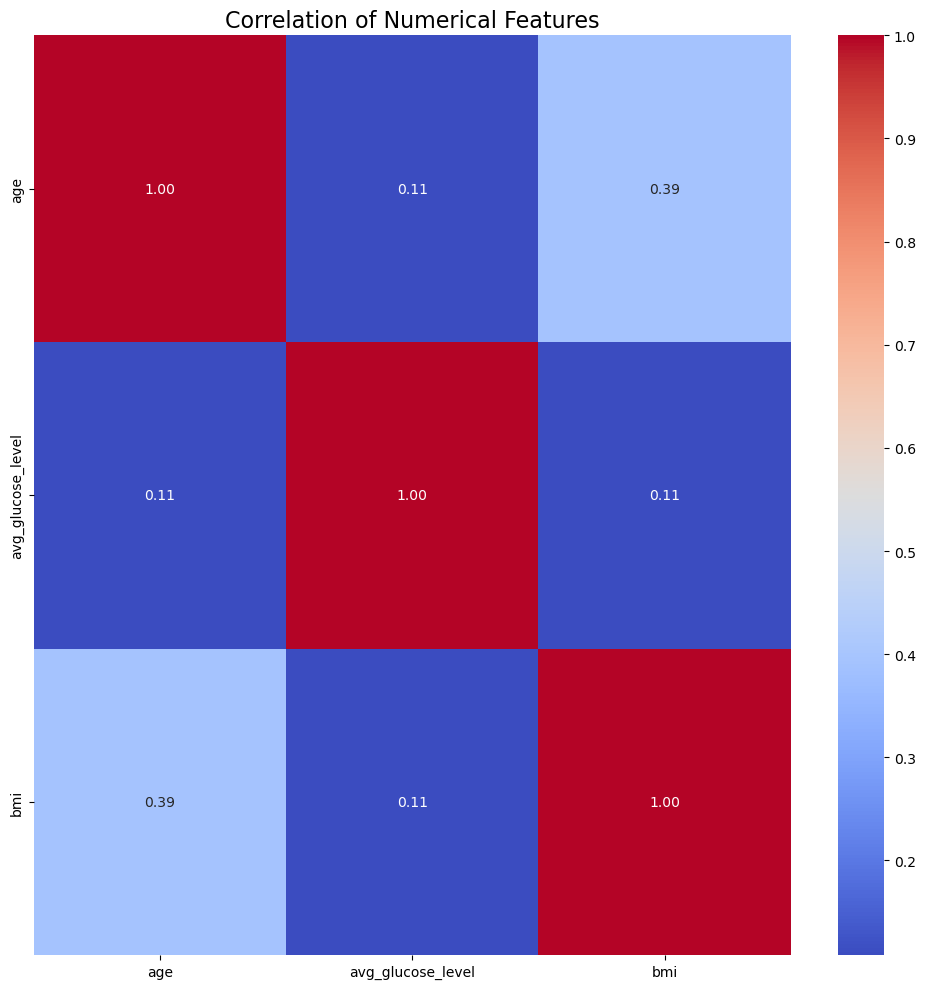

In [293]:
fig, axis = plt.subplots(figsize=(10, 10))
corr_matrix = train[numerical_features].corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axis)
axis.set_title('Correlation of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

In [294]:
label_encoder = LabelEncoder()
columns_to_encode = ["gender", "ever_married", "Residence_type"]
train[columns_to_encode] = train[columns_to_encode].apply(label_encoder.fit_transform)

encoded_cat_var = pd.get_dummies(train[["work_type", "smoking_status"]], drop_first=True)
dataF = pd.concat([train.drop(["work_type", "smoking_status", "id"], axis=1), encoded_cat_var], axis=1)

In [295]:
train["gender"] = train["gender"].map({"Male":1,"Female":0,1:1,0:0})
train["ever_married"] = train["ever_married"].map({"Yes":1,"No":0,1:1,0:0})
train["Residence_type"] = train["Residence_type"].map({"Urban":1,"Rural":0,1:1,0:0})

enc_feature = ["work_type","smoking_status","gender"]
ohc = OneHotEncoder(handle_unknown='ignore', drop='first')
ohc.fit(train[enc_feature])
encoded_cat_var = pd.DataFrame(ohc.transform(train[enc_feature]).toarray(), columns= ohc.get_feature_names_out(enc_feature))
dataF = pd.concat([train, encoded_cat_var], axis=1)
dataF = dataF.drop(enc_feature + ['id'], axis=1)
dataF

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_1.0,gender_nan
0,28.0,0,0,1,1,79.53,31.1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,33.0,0,0,1,0,78.44,23.9,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,1,0,103.00,40.3,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56.0,0,0,1,1,64.87,28.8,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.0,0,0,0,0,73.36,28.8,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,22.0,0,0,0,1,72.63,19.5,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15300,46.0,1,0,1,1,101.19,32.1,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15301,75.0,0,0,1,1,87.69,26.2,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
15302,46.0,0,0,1,0,101.13,22.5,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [296]:
X = dataF.drop(["stroke"], axis=1)
y = dataF['stroke']

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [299]:
knn = KNeighborsClassifier(leaf_size=30, n_neighbors=15, p=2, weights='distance').fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)
predictions = knn.predict(X_test)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

Train Accuracy: 1.0
Test Accuracy: 0.957203528258739
Precision: 0.4444444444444444
Recall: 0.03076923076923077
F1-score: 0.05755395683453238
ROC AUC Score: 0.5145316641734246


In [300]:
logic = LogisticRegression(C=1.0, solver="lbfgs", penalty="l2", class_weight="balanced")
logic.fit(X_train, y_train)

train_score = logic.score(X_train, y_train)
test_score = logic.score(X_test, y_test)
predictions = logic.predict(X_test)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)


print("Training Accuracy:", train_score)
print("Test Accuracy:", test_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

Training Accuracy: 0.7847749734542188
Test Accuracy: 0.7912446912773603
Precision: 0.1489655172413793
Recall: 0.8307692307692308
F1-score: 0.25263157894736843
ROC AUC Score: 0.8101304359236806


In [301]:

random = RandomForestClassifier(n_estimators=100, min_samples_leaf=20, max_depth=8, max_samples=0.8, class_weight='balanced')
random.fit(X_train, y_train)

train_score = random.score(X_train, y_train)
test_score = random.score(X_test, y_test)
predictions = random.predict(X_test)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

Train Accuracy: 0.7917177162460182
Test Accuracy: 0.7817706631819666
Precision: 0.1422872340425532
Recall: 0.823076923076923
F1-score: 0.24263038548752835
ROC AUC Score: 0.8015077552948586


In [302]:
gnb = GaussianNB(var_smoothing=1).fit(X_train, y_train)

train_score = gnb.score(X_train, y_train)
test_score = gnb.score(X_test, y_test)
predictions = gnb.predict(X_test)

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

print("Train Score:", train_score)
print("Test Score:", test_score)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)

Train Score: 0.9498488932451197
Test Score: 0.9487095720352826
Precision: 0.3150684931506849
Recall: 0.17692307692307693
F1-score: 0.22660098522167488
ROC AUC Score: 0.5799320263496313


In [303]:
def create_models():
    models = list()
    models.append(("logic", LogisticRegression(C=1.0, solver="lbfgs", penalty="l2", class_weight="balanced", random_state=42)))
    models.append(("random", RandomForestClassifier(n_estimators=100, min_samples_leaf=20, max_depth=8, max_samples=0.8, class_weight='balanced', random_state=42)))
    models.append(("gnb", GaussianNB()))
    return models

def train_ensemble(models, X_t, y_t, X_val, y_val, reg=1, tolerance=1e-4):
    X_meta = list()
    for name, model in models:
        model.fit(X_t, y_t)
        y_t_pred = model.predict_proba(X_val)
        X_meta.append(y_t_pred)
    
    X_meta = np.hstack(X_meta)
    blender = LogisticRegression(class_weight="balanced", C=reg, tol=tolerance)
    blender.fit(X_meta, y_val)
    return blender
    
def test_ensemble(models, blender, X_test, probability=False, threshold=0.5):
    X_meta = list()
    for name, model in models:
        y_pred = model.predict_proba(X_test)
        X_meta.append(y_pred)
    
    X_meta = np.hstack(X_meta)
    y_pred = blender.predict_proba(X_meta)
    if not probability:
        y_pred = list(map(lambda x: 1 if x > threshold else 0, y_pred[:, 1]))
    return y_pred

X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

models = create_models()
blender = train_ensemble(models, X_train1, y_train1, X_val1, y_val1)


In [304]:
y_test_pred = test_ensemble(models,blender,X_test,True)[:,1]
print(roc_auc_score(y_test,y_test_pred))

0.8835787208356298


In [306]:
test["gender"] = test["gender"].map({"Male":1,"Female":0,1:1,0:0})
test["ever_married"] = test["ever_married"].map({"Yes":1,"No":0,1:1,0:0})
test["Residence_type"] = test["Residence_type"].map({"Urban":1,"Rural":0,1:1,0:0})

encoded_cat_var = pd.DataFrame(ohc.transform(test[enc_feature]).toarray(), columns= ohc.get_feature_names_out(enc_feature))
dataF_ = pd.concat([test, encoded_cat_var], axis=1)
dataF_ = dataF_.drop(enc_feature + ['id'], axis=1)
   
dataF_[numerical_features] = scaler.transform(dataF_[numerical_features]) 
dataF_

predictions = pd.DataFrame({
    "id": test["id"],
    "stroke": test_ensemble(models, blender, dataF_, True)[:, 1]
})
predictions.to_csv("submission.csv", index=False)
predictions.head(10)


,id,stroke
0,15304,0.536995
1,15305,0.901728
2,15306,0.062075
3,15307,0.455056
4,15308,0.191748
5,15309,0.217510
6,15310,0.125026
7,15311,0.679839
8,15312,0.062535
9,15313,0.501784
